<a href="https://colab.research.google.com/github/lazarogibert/Repositorio/blob/main/mandarinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from  matplotlib.pyplot import scatter
import seaborn as sns
# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import precision_score

In [2]:
rng = np.random.RandomState(0)
X1, y1 = make_classification(n_samples=1000,n_features=4 ,random_state=rng)
X = pd.DataFrame(X1,columns=['area','azucares','proteinas','acidez'])
y = pd.Series(y1,name='tipo_fruta')
datos=X.join(y)

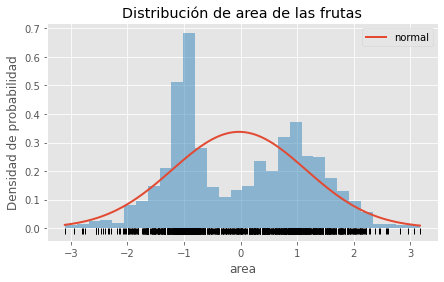

In [3]:
mu, sigma = stats.norm.fit(X.area)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(X.area), max(X.area), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=X.area, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(X.area, np.full_like(X.area, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de area de las frutas')
ax.set_xlabel('area')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();



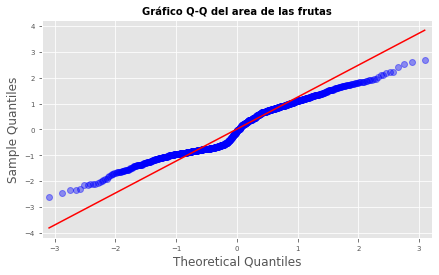

In [4]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    X.area,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del area de las frutas', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

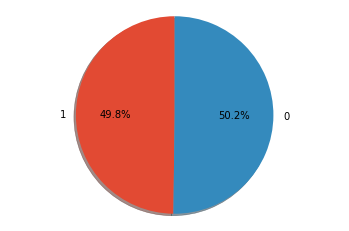

In [5]:
#Decision class distribution
groups = datos['tipo_fruta'].value_counts()
sizes = [groups[0], groups[1]]
labels = list(map(lambda e: str(e), groups.index))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

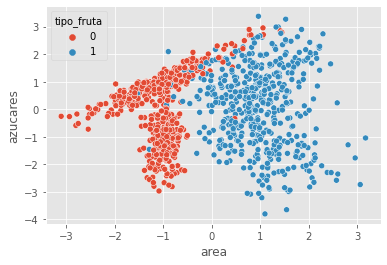

In [6]:
sns.scatterplot(data=datos, x="area",y="azucares",hue="tipo_fruta" )

0.956
              precision    recall  f1-score   support

   Mndarinas       0.94      0.98      0.96       131
    Naranjas       0.97      0.93      0.95       119

    accuracy                           0.96       250
   macro avg       0.96      0.95      0.96       250
weighted avg       0.96      0.96      0.96       250



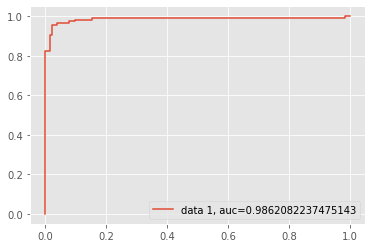

Text(0.5, 257.44, 'Predicted label')

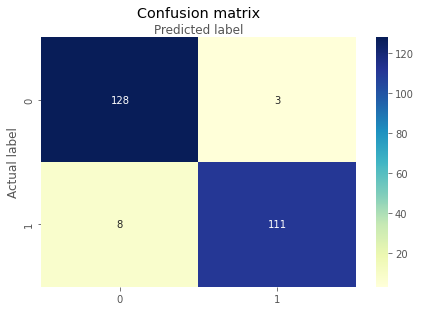

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel ='rbf'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score=clf.score(X_test, y_test)
print(score)
target_names = ['Mndarinas', 'Naranjas']
print(classification_report(y_test, y_pred, target_names=target_names))
y_pred_proba = clf.decision_function(X_test)[::]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 1.0, 'Precision-Recall Curve')

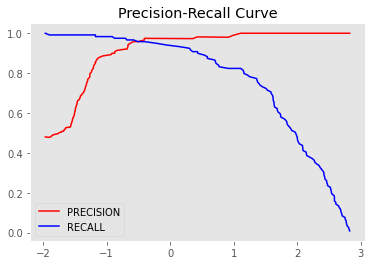

In [8]:
decision_function = clf.decision_function(X_test) 
precision, recall, treshold = precision_recall_curve(y_test, decision_function) 
  
plt.plot(treshold, precision[:-1], c ='r', label ='PRECISION') 
plt.plot(treshold, recall[:-1], c ='b', label ='RECALL') 
plt.grid() 
plt.legend() 
plt.title('Precision-Recall Curve')

In [9]:
df = clf.decision_function(X_test) 
  
decision_teshold = 0.3999999999999999 
               
                     
desired_predict =[] 
  
for i in df: 
    if i<decision_teshold: 
        desired_predict.append(0) 
    else: 
        desired_predict.append(1) 


print("old precision value:", precision_score(y_test, y_pred)) 
print("new precision value:", precision_score(y_test, desired_predict))  
target_names = ['Mndarinas', 'Naranjas']
print(classification_report(y_test, y_pred, target_names=target_names))       

old precision value: 0.9736842105263158
new precision value: 0.9818181818181818
              precision    recall  f1-score   support

   Mndarinas       0.94      0.98      0.96       131
    Naranjas       0.97      0.93      0.95       119

    accuracy                           0.96       250
   macro avg       0.96      0.95      0.96       250
weighted avg       0.96      0.96      0.96       250

